In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

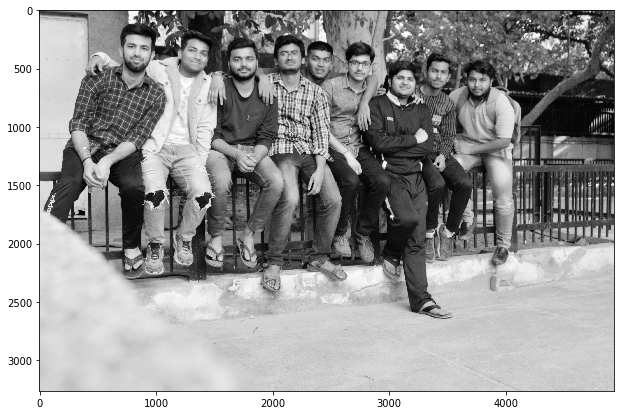

In [67]:
test_image=cv2.imread('data/frnds.jpg')
test_image_gray=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,7))
plt.imshow(test_image_gray,cmap='gray')

In [22]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')
#if you have a haarcascades file dwnlded then specify the path else see the below method
# OR 
# face_cascade =cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [68]:
faces=haar_cascade_face.detectMultiScale(test_image_gray,scaleFactor=1.3, minNeighbors=5 )
print(f'Faces Found: {len(faces)}')

Faces Found: 9


In [71]:
for (x,y,w,h) in faces:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 8)

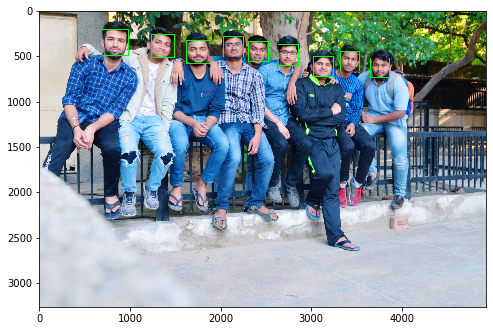

In [72]:
plt.figure(figsize=(8,12))
plt.imshow(cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB))

In [76]:
def detect_faces(cascade, test_image, border):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), border)
        
    return image_copy


def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

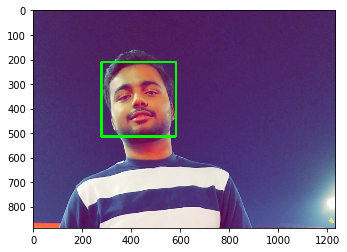

In [77]:
test_image2 = cv2.imread('data/shubham.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, 8)

plt.imshow(convertToRGB(faces))

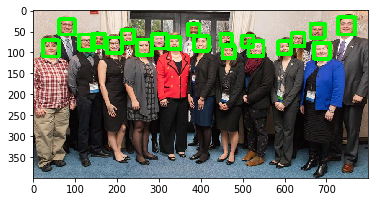

In [78]:
test_image2 = cv2.imread('data/grp.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, 8)

plt.imshow(convertToRGB(faces))

#       Face And Eye Detection

In [80]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")
# OR 
#eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml') if you have 
# eye.xml file dwnlded in  the data folder

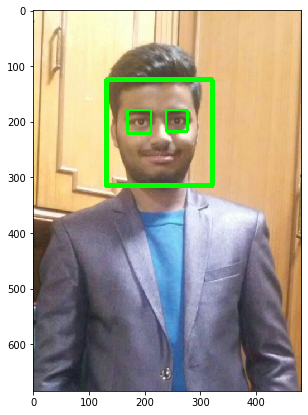

In [87]:
img=cv2.imread('data/shubham1.jpg')
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=haar_cascade_face.detectMultiScale(img_gray,1.3,5)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),8)
     
    eyes = eye_cascade.detectMultiScale(img_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

plt.figure(figsize=(7,7))
plt.imshow(convertToRGB(img)) 